# Run Comparisons

1. Runs the model at 3 different sets of inputs
2. Plots the 6 resulting lines
3. Cleans up the files

## Imports and settings

Set the ```initial_plants``` variable to one of the provided options

They represent the following power distributions:

| Name    | Coal | Gas | Nuclear | Wind |
|---------|------|-----|---------|------|
| ninety  | 0.5  | 0.4 | 0.1     | 0.0  |
| seventy | 0.5  | 0.2 | 0.2     | 0.1  |
| fifty   | 0.3  | 0.2 | 0.3     | 0.2  |





In [53]:
from functions.combinefunctions import combine

# initial_plants = "ninety"           # An initial state with 90% fossil fuel usage
# initial_plants = "seventy"          # An initial state with 70% fossil fuel usage
initial_plants = "fifty"            # An initial state with 50% fossil fuel usage

combined = combine(initial_plants)


## Optional: Rebuild the model

Uncomment these lines to rebuild the model with Maven

In [54]:
! cd ../model/ && mvn clean compile assembly:single -q && cd ../model/
! mv ../model/target/model-1.0-SNAPSHOT-jar-with-dependencies.jar model.jar && echo "Built and moved the model\n"

Built and moved the model



## Run the model

In [55]:
call = combined.get_data_call()

! cd temp && $call 

Finished 100 Tax runs with tax rate 30 using seeds in the range [1, 100]
Finished 100 Trade runs with cap reduction rate 1.0 using seeds in the range [1, 100]
Finished 100 Tax runs with tax rate 60 using seeds in the range [1, 100]
Finished 100 Trade runs with cap reduction rate 2.5 using seeds in the range [1, 100]
Finished 100 Tax runs with tax rate 120 using seeds in the range [1, 100]
Finished 100 Trade runs with cap reduction rate 5.0 using seeds in the range [1, 100]


## Plot the data

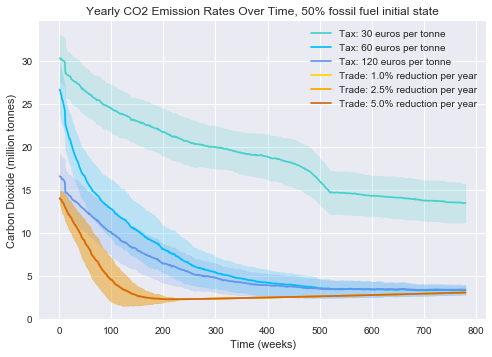

In [56]:
combined.get_plots()

## Run the statistical tests

In [57]:
a, b, c = combined.statistics()
a



,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Measure,c120,c1_0,False,True,15.269683,200.0,two-sided,2.096011e-35,8.447e+31,2.140674
1,Measure,c120,c2_5,False,True,15.269683,200.0,two-sided,2.096011e-35,8.447e+31,2.140674
2,Measure,c120,c30,False,True,-46.595453,200.0,two-sided,2.383236e-109,1.562e+105,-6.532270
3,Measure,c120,c5_0,False,True,15.269683,200.0,two-sided,2.096011e-35,8.447e+31,2.140674
4,Measure,c120,c60,False,True,-3.243184,200.0,two-sided,1.385121e-03,19.387,-0.454666
5,Measure,c1_0,c2_5,False,True,0.000000,200.0,two-sided,1.000000e+00,0.153,0.000000
6,Measure,c1_0,c30,False,True,-67.286427,200.0,two-sided,2.513951e-139,9.858e+134,-9.432962
7,Measure,c1_0,c5_0,False,True,0.000000,200.0,two-sided,1.000000e+00,0.153,0.000000
8,Measure,c1_0,c60,False,True,-17.204869,200.0,two-sided,2.604392e-41,5.554e+37,-2.411970
9,Measure,c2_5,c30,False,True,-67.286427,200.0,two-sided,2.513951e-139,9.858e+134,-9.432962


## Show the ten year pairwise t-test

In [58]:
b


,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Measure,c120,c1_0,False,True,15.269683,200.0,two-sided,2.096011e-35,8.447e+31,2.140674
1,Measure,c120,c2_5,False,True,15.269683,200.0,two-sided,2.096011e-35,8.447e+31,2.140674
2,Measure,c120,c30,False,True,-46.595453,200.0,two-sided,2.383236e-109,1.562e+105,-6.532270
3,Measure,c120,c5_0,False,True,15.269683,200.0,two-sided,2.096011e-35,8.447e+31,2.140674
4,Measure,c120,c60,False,True,-3.243184,200.0,two-sided,1.385121e-03,19.387,-0.454666
5,Measure,c1_0,c2_5,False,True,0.000000,200.0,two-sided,1.000000e+00,0.153,0.000000
6,Measure,c1_0,c30,False,True,-67.286427,200.0,two-sided,2.513951e-139,9.858e+134,-9.432962
7,Measure,c1_0,c5_0,False,True,0.000000,200.0,two-sided,1.000000e+00,0.153,0.000000
8,Measure,c1_0,c60,False,True,-17.204869,200.0,two-sided,2.604392e-41,5.554e+37,-2.411970
9,Measure,c2_5,c30,False,True,-67.286427,200.0,two-sided,2.513951e-139,9.858e+134,-9.432962


## Show the fifteen year pairwise t-test

In [59]:
c

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Measure,c120,c1_0,False,True,15.269683,200.0,two-sided,2.096011e-35,8.447e+31,2.140674
1,Measure,c120,c2_5,False,True,15.269683,200.0,two-sided,2.096011e-35,8.447e+31,2.140674
2,Measure,c120,c30,False,True,-46.595453,200.0,two-sided,2.383236e-109,1.562e+105,-6.532270
3,Measure,c120,c5_0,False,True,15.269683,200.0,two-sided,2.096011e-35,8.447e+31,2.140674
4,Measure,c120,c60,False,True,-3.243184,200.0,two-sided,1.385121e-03,19.387,-0.454666
5,Measure,c1_0,c2_5,False,True,0.000000,200.0,two-sided,1.000000e+00,0.153,0.000000
6,Measure,c1_0,c30,False,True,-67.286427,200.0,two-sided,2.513951e-139,9.858e+134,-9.432962
7,Measure,c1_0,c5_0,False,True,0.000000,200.0,two-sided,1.000000e+00,0.153,0.000000
8,Measure,c1_0,c60,False,True,-17.204869,200.0,two-sided,2.604392e-41,5.554e+37,-2.411970
9,Measure,c2_5,c30,False,True,-67.286427,200.0,two-sided,2.513951e-139,9.858e+134,-9.432962


In [60]:
! rm temp/*.csv && rm temp/clean/*.csv

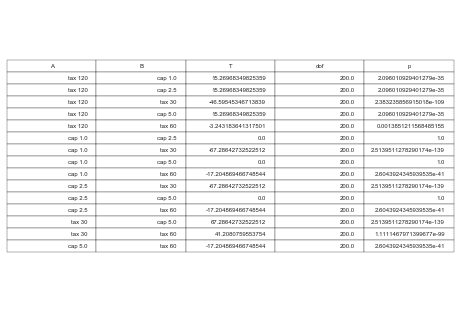

In [74]:
import matplotlib.pyplot as plt

def save_t(df, name):
    df = df[['A', 'B', 'T', 'dof', 'p-unc']].copy()
    rep = {'c30': 'tax 30', 'c60': 'tax 60', 'c120': 'tax 120', 'c1_0': 'cap 1.0', 'c2_5': 'cap 2.5', 'c5_0': 'cap 5.0'}
    df = df.replace(rep).rename(columns={'p-unc': 'p'})
    fig, ax =plt.subplots(1,1)
    return df

def plot_df(df, name):
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=df.values,
    colLabels=df.columns,
    loc="center")

    plt.show()

temp = save_t(a, a)





# def save_t(df, name):
#     df = df[['A', 'B', 'p-unc']].copy()
#     df.to_csv((name + '.csv'))

In [62]:
# save_t(a, initial_plants + 'a')
# save_t(b, initial_plants + 'b')
# save_t(c, initial_plants + 'c')